In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb

In [68]:
df = pd.read_csv("../data/kaggle_house_price/kaggle_house_pred_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
df['UnitPrice'] = df['SalePrice']/df['LotArea']

In [70]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [71]:

def summary(x):
    gb = df.groupby(x).agg({'SalePrice':["count","sum","mean"], 'UnitPrice':["mean"]})
    gb.columns = ["_".join(item) for item in gb.columns]
    gb['SalePrice_mean'] = gb.apply(lambda x: round(x.SalePrice_mean), axis=1)
    gb['UnitPrice_mean'] = gb.apply(lambda x: round(x.UnitPrice_mean,1), axis=1)
    gb.sort_values(by=["UnitPrice_mean"], inplace=True)
    return gb


In [72]:
x = 'MSSubClass'
gb = summary(x)
gb

,SalePrice_count,SalePrice_sum,SalePrice_mean,UnitPrice_mean
MSSubClass,,,,
190,30,3888400,129613,13.1
30,69,6612251,95830,13.5
90,52,6944136,133541,14.6
40,4,624500,156125,14.7
80,58,9844720,169737,16.2
50,144,20635628,143303,16.4
85,20,2956200,147810,16.4
45,12,1303100,108592,16.5
75,16,3079000,192438,17.2


In [73]:
df_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix = "MSSubClass", dummy_na=False)
df_MSSubClass.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [74]:
x = 'LotConfig'
gb = summary(x)
gb

,SalePrice_count,SalePrice_sum,SalePrice_mean,UnitPrice_mean
LotConfig,,,,
CulDSac,94,21042334,223855,17.4
Corner,263,47766961,181623,18.1
FR2,47,8362925,177935,21.1
Inside,1052,186138826,176938,22.1
FR3,4,833900,208475,28.5


In [82]:
df2 = pd.read_csv("../data/kaggle_house_price/kaggle_house_pred_train_processed.csv",sep="\t")
df2.head()

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YearRemodAdd_Grade,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,0.350880,3,3,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,3,208500
1,0,0,1,0,0,0,0,0,0,0,...,-0.060710,3,3,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,0,181500
2,0,0,0,0,1,0,0,0,0,0,...,0.631510,3,3,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,3,223500
3,1,0,0,0,0,0,0,0,0,0,...,0.790533,3,3,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,0,140000
4,0,0,1,0,0,0,0,0,0,0,...,1.697903,3,3,0.779930,0.563567,-0.359202,-0.116299,-0.270116,3,250000


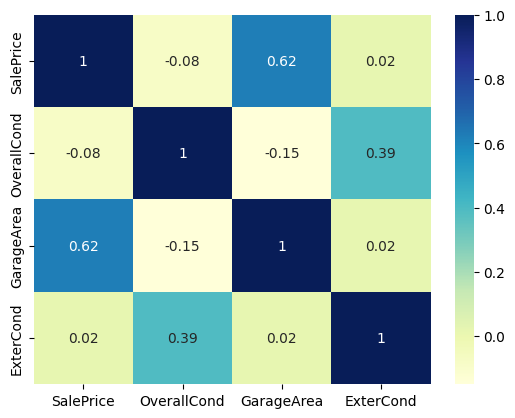

In [83]:
# df.corr()
dataplot = sb.heatmap(df2[["SalePrice", "OverallCond","GarageArea","ExterCond"]].corr().applymap(lambda x: round(x,2)), cmap="YlGnBu", annot=True)
mp.show()

In [84]:
d = {}
for col in df2.columns:
    corr = df2["SalePrice"].corr(df2[col])
    d[col] = corr

for k, v in sorted(d.items(), key= lambda x: x[1], reverse=True):
    print(k,v)

SalePrice 0.9999999999999998
OverallQual 0.7909816017406497
GrLivArea 0.7086244754498796
ExterQual 0.6826392416562598
KitchenQual 0.6595997207286634
GarageCars 0.640409196774168
GarageArea 0.6234314380031443
TotalBsmtSF 0.6135805565641899
1stFlrSF 0.6058521855192732
BsmtQual 0.5852071991725195
FullBath 0.5606637604390982
GarageFinish 0.5492467563332121
TotRmsAbvGrd 0.533723154746077
FireplaceQu 0.5204376059504018
YearRemodAdd 0.5071009676998929
Foundation_PConc 0.49773375258693686
YearRemodAdd_Grade 0.4777675411308878
MasVnrArea 0.4726145001396661
Fireplaces 0.46692883932147156
HeatingQC 0.42764870739880356
Neighborhood_NridgHt 0.40214859817526716
BsmtFinSF1 0.3864198019044788
BsmtExposure 0.3746962210008867
SaleType_New 0.3575094050831937
SaleCondition_Partial 0.35205985467143425
GarageType_Attchd 0.33596064720954444
MasVnrType_Stone 0.330475646543412
Neighborhood_NoRidge 0.3304236257653573
WoodDeckSF 0.3244134424412961
2ndFlrSF 0.3193338101264227
OpenPorchSF 0.31585622533817137
Exter